In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd

all_data={}
for j in [150,250]:
    my_array=np.zeros((200,200,100))
    data03=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/depth_test/results/dosetomedium_water_depthtest_openbeam_"+str(j)+"MV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
    for i in np.arange(2,6):
        data1=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/depth_test/results/dosetomedium_water_depthtest_openbeam_"+str(j)+"MV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
        data03.dose=data03.dose+ data1.dose
    data03.dose=(data03.dose/5e6)/(1.60218e-19)*0.75e-6;
    for i in np.arange(0,len(data03.x)):
        my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
    all_data[j]=np.array(my_array)



-0.2953934606226388


Text(0.5, 1.0, 'Open beam')

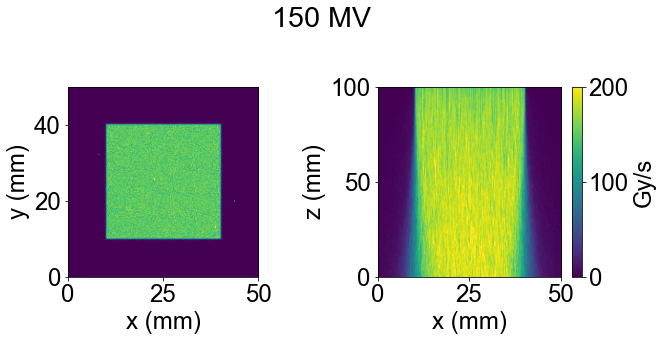

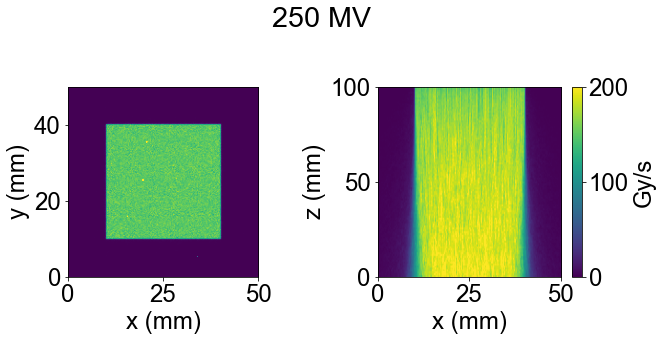

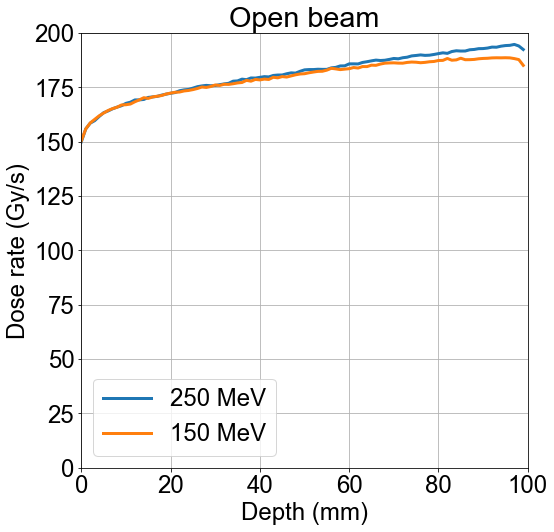

In [10]:
from itertools import combinations
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)


y= np.arange(0,200)*0.25
x= np.arange(0,200)*0.25
z= np.arange(0,100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
im1=ax1.imshow(all_data[150][:,:,0],extent=(0,200*0.25,0,200*0.25),vmax=200)
ax2.imshow(all_data[150][:,100,:].T,aspect='auto',extent=(0,200*0.25,0,100),vmax=200)
ax1.set_ylabel('y (mm)')
ax1.set_xlabel('x (mm)')
ax2.set_ylabel('z (mm)')
ax2.set_xlabel('x (mm)')
fig.colorbar(im1,ax=ax2,label='Gy/s')
fig.suptitle('150 MV')
fig.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(all_data[250][:,:,0],extent=(0,200*0.25,0,200*0.25),vmax=200)
ax2.imshow(all_data[250][:,100,:].T,aspect='auto',extent=(0,200*0.25,0,100),vmax=200)
ax1.set_ylabel('y (mm)')
ax1.set_xlabel('x (mm)')
ax2.set_ylabel('z (mm)')
ax2.set_xlabel('x (mm)')
fig.colorbar(im1,ax=ax2,label='Gy/s')
fig.suptitle('250 MV')
fig.tight_layout()


figure(3,figsize=(8,8))
PDD250=np.zeros(100)
PDD150=np.zeros(100)
PDD250_err=np.zeros(100)
PDD150_err=np.zeros(100)
for i in np.arange(0,100):
    PDD250[i]=np.mean([all_data[250][j,m,i] for j in np.arange(90,110) for m in np.arange(90,110)])
    PDD250_err[i]=np.std([all_data[250][j,m,i] for j in np.arange(90,110) for m in np.arange(90,110)])/np.sqrt(20**2)
    PDD150[i]=np.mean([all_data[150][j,m,i] for j in np.arange(90,110) for m in np.arange(90,110)])
    PDD150_err[i]=np.std([all_data[150][j,m,i] for j in np.arange(90,110) for m in np.arange(90,110)])/np.sqrt(20**2)
figure(3,figsize=(8,8))
plt.plot(z,PDD250,label='250 MeV',lw=3)
plt.plot(z,PDD150,label='150 MeV',lw=3)
plt.fill_between(z, PDD250-PDD250_err, PDD250+PDD250_err,alpha=0.4)
plt.fill_between(z, PDD150-PDD150_err, PDD150+PDD150_err,alpha=0.4)
plt.grid()
plt.xlim(0,100)
plt.ylim(0,200)
plt.xlabel('Depth (mm)')
plt.ylabel('Dose rate (Gy/s)')
plt.legend()
print((PDD250[0]-PDD150[0])/PDD150[0]*100)
plt.title('Open beam')